# Lesson 24 - Principal Component Analysis  (PCA)
chapter 8 in "Hands-on Machine Learning"

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Introduction to PCA

**Principal component analysis** is an unsupervised **dimensionality reduction** technique. It allows us to reduce a dataset with a large number of features (dimensions) to one with a smaller number of features, hopefully without losing too much information in the process. 

One method of performing dimensionality reduction in a supervised learning task is to simply remove from the dataset features that are deemed to not have much influence on the response variable. This method of dimensionality reduction is referred to as **feature selection**. The LASSO algorithm performs a type of automatic feature selection without any input from us.

The type of dimensionality reduction performed in PCA, on the other hand, is referred to as **feature extraction**. In feature extraction methods, the features are transformed into new features are in some way functions of the old features. The goal of PCA is to extract new features that capture most of the information contained in the original dataset, but with fewer features. 

To illustrate the idea behind PCA, we will consider an example.

In [3]:
from sklearn.decomposition import PCA

## Example 1: Two Features

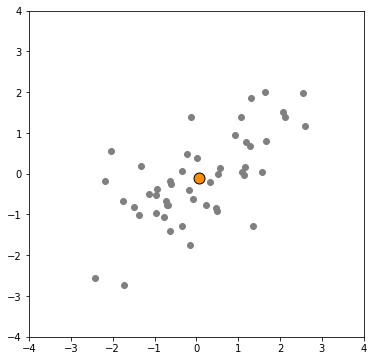

In [4]:
# Generate and plot synthetic dataset 
np.random.seed(1)
n = 50
v0 = np.random.normal(0,1.2,[n,1])
v1 = np.random.normal(0,0.6,[n,1])
X = np.hstack([v0 + v1, 0.8*v0 - v1])

mu = np.mean(X, axis=0)

plt.figure(figsize=[6,6])
plt.scatter(X[:,0], X[:,1], c='grey')
plt.scatter(mu[0], mu[1], c='darkorange', edgecolor='k', s=120)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

### Perform PCA

We will use the `PCA` class from `sklearn` to perform Principal Component Analysis. The code below creates a new, transformed feature array called `Z`. The shape of `Z` is the same as that of the orginal feature array `X`. 

In [5]:
# Find transformed coordinates and principal components
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

print('Original Feature Values:')
print(X[:5,:])
print()
print('Transformed Feature Values:')
print(Z[:5,:])

Original Feature Values:
[[ 2.12931663  1.37926936]
 [-0.9454576  -0.37593625]
 [-1.31931702  0.17846604]
 [-1.49716798 -0.82044424]
 [ 0.91315262  0.95612786]]

Transformed Feature Values:
[[-2.55142956 -0.09202464]
 [ 0.95372913  0.40681985]
 [ 0.90911469  1.07400971]
 [ 1.66211229  0.39397491]
 [-1.3312633   0.31943363]]


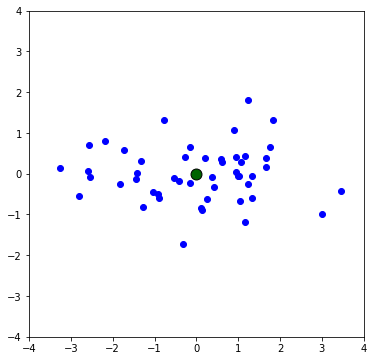

In [6]:
# Plot the tranformed dataset (i.e. plot the Z's instead of X's) 
muZ = np.mean(Z, axis=0)

plt.figure(figsize=[6,6])
plt.scatter(Z[:,0], Z[:,1], c='blue')
plt.scatter(muZ[0], muZ[1], c='darkgreen', edgecolor='k', s=120)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

## Principal Components

The first step of PCA is to create a set of mutually orthogonal (perpendicular) vectors called **principal components**. Roughtly speaking, the first principal component is selected to point in the direction of the greated variance in the dataset. Each subsequent principal component is selected so that it is perpendical to all previous components, and also points in the direction of greatest variance in the dataset among all such vectors. We will illustrate this idea more clearly in a moment. 

The `pca` object returned by the `PCA` class above has an attribute `components_` that contains the principal components. 

Mathematically, matrix  $X$ gets decomposed into the product of $U D V^t$, where $V$ contains column vectors in orhogonal directs, and the diagonal matrix $D$ contains **singular values** of $X$.  The PCA algorithm keeps only the features which have their singular values larger than a treshhold value (i.e., discards those values which are close to zero). 

In [9]:
#they use singular value decomposition which is from linear algebra

In [10]:
pc = pca.components_
print(pc)

[[-0.78994896 -0.61317261]
 [-0.61317261  0.78994896]]


To get a sense as to what the principal components are meant to convey, we will plot them as vectors emanating from the mean point in our dataset. 

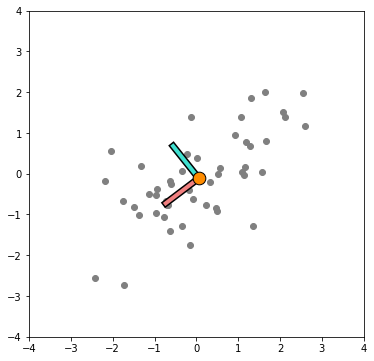

In [11]:
%run -i Snippets/snippet17.py

## Using Principal Components to Perform Transformation

To help us understand how the principal components are used to obtain the transformed feature values from the original feature values, we will consider the following plots of both data sets. 

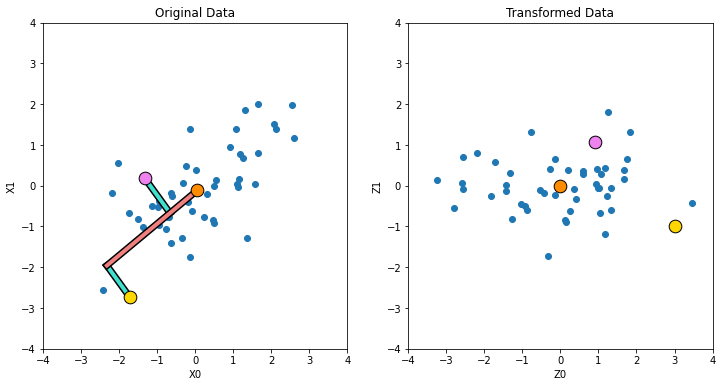

In [12]:
%run -i Snippets/snippet18.py

In [13]:
print('Original Coordinates:')
print(X[[2,11],:])
print()
print('Transformed Coordinates:')
print(Z[[2,11],:])

Original Coordinates:
[[-1.31931702  0.17846604]
 [-1.72044796 -2.72945597]]

Transformed Coordinates:
[[ 0.90911469  1.07400971]
 [ 3.00904578 -0.97713775]]


## Reconstructing Original Samples from Transformed Feature Values

In [14]:
print('X coords of first sample:', X[2,:])

print('Z coords of first sample:', Z[2,:])

X coords of first sample: [-1.31931702  0.17846604]
Z coords of first sample: [0.90911469 1.07400971]


In [15]:
mu = np.mean(X, axis=0)

print(mu +  Z[2,0] * pc[0,:] + Z[2,1] * pc[1,:])
print(X[2,:])

[-1.31931702  0.17846604]
[-1.31931702  0.17846604]


## Explained Variance Ratio

The `pca` object contains an attribute called `explained_variance_ratio_` that, roughly speaking, explains what proportion of the information in the original dataset is explained by the feature associated with each principal component. 

In [16]:
print(pca.explained_variance_ratio_) #singular values

[0.83623923 0.16376077]


In [17]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.83623923 1.        ]


We can see that the first feature in the transformed dataset contains, by itself, roughtly 83.6% of the information contained in the original dataset. The second feature explains the remaining 16.4% of the information from the original dataset. 

We will get some additional inside concerning the explained variance ration in the next example. 

## Example 2: Three Features

<IPython.core.display.Javascript object>


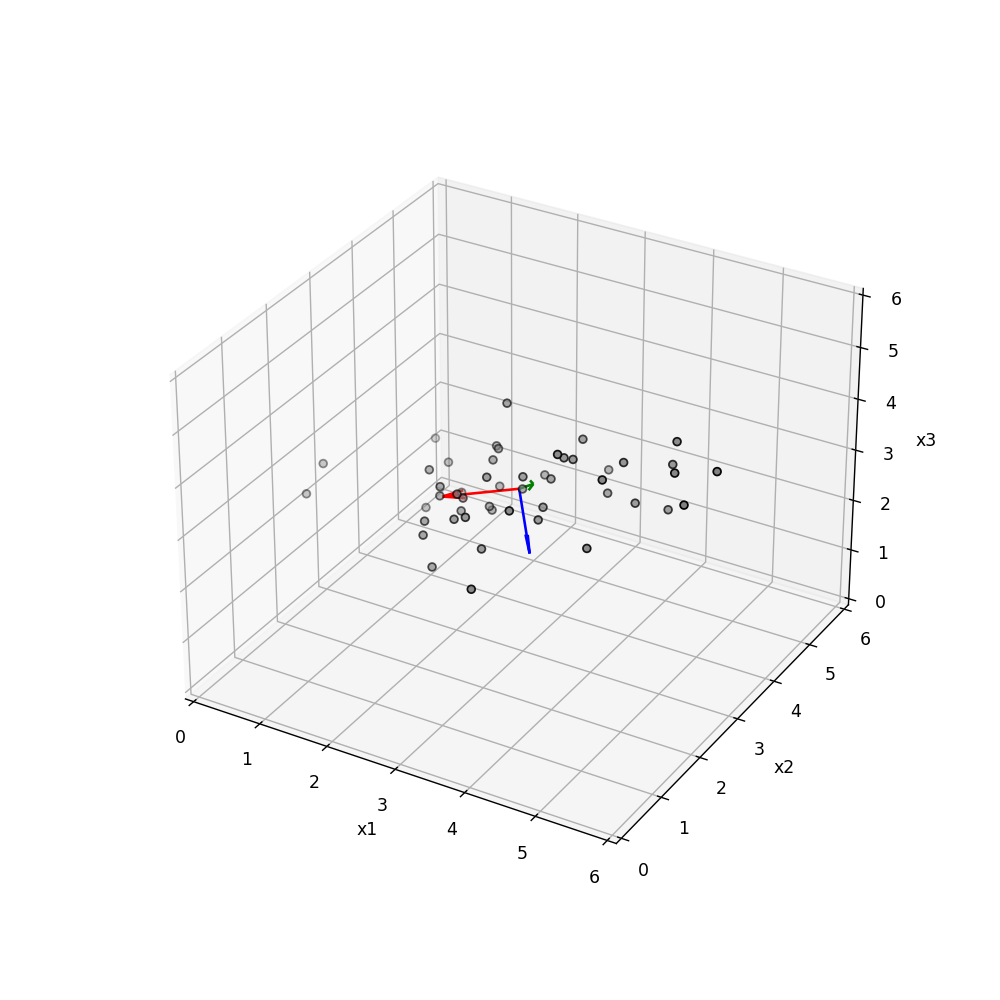

<IPython.core.display.Javascript object>


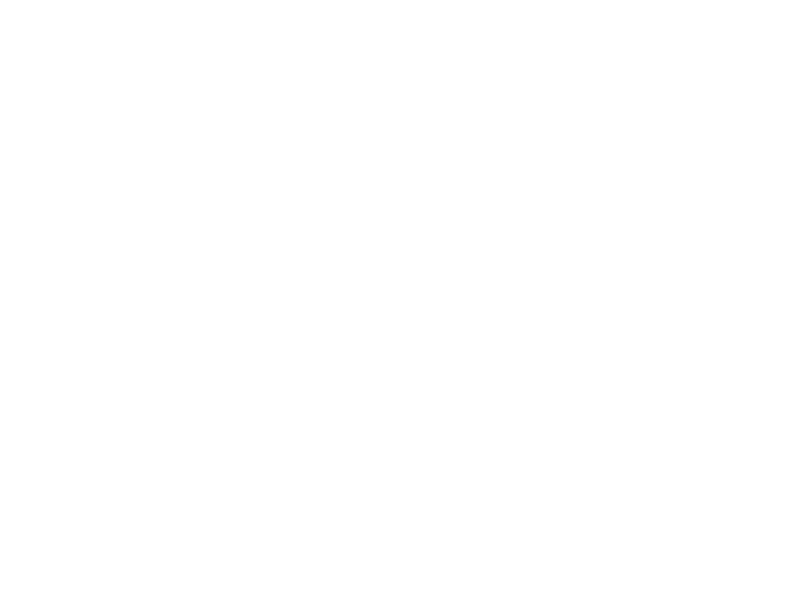

In [18]:
%matplotlib notebook

%run -i Snippets/snippet19.py

## Principal Components

In [20]:
# Find transformed coordinates and principal components
pca = PCA(n_components=3)
Z = pca.fit_transform(X)
print(np.shape(Z))
pc = pca.components_
print(pc)

(50, 3)
[[-0.8793447  -0.42686079 -0.21105158]
 [ 0.40167988 -0.42688762 -0.81019765]
 [-0.2557463   0.79721818 -0.54684276]]


## Reconstructing Original Samples from Transformed Feature Values

Here is the first point in our original set.

In [21]:
print(X[0,:])

[4.59696967 4.00295115 3.53864171]


Here is the transformed version of the same point. 

In [22]:
print(Z[0,:])

[-1.97780482 -0.12735838  0.11529583]


The coordinates of Z represent how far from the mean we move in the direction of each of the principal components. 

In [23]:

delta0 = Z[0,0] * pc[0]
delta1 = Z[0,1] * pc[1]
delta2 = Z[0,2] * pc[2]


print(delta0)
print(delta1)
print(delta2)

[1.73917219 0.84424732 0.41741883]
[-0.0511573   0.05436772  0.10318546]
[-0.02948648  0.09191593 -0.06304869]


In [24]:
mu = np.mean(X, axis=0)
print(mu)


new_point = mu + delta0 + delta1 + delta2
print(new_point)
print(X[0,:])

[2.93844127 3.01242018 3.08108611]
[4.59696967 4.00295115 3.53864171]
[4.59696967 4.00295115 3.53864171]


## Dimensionality Reduction

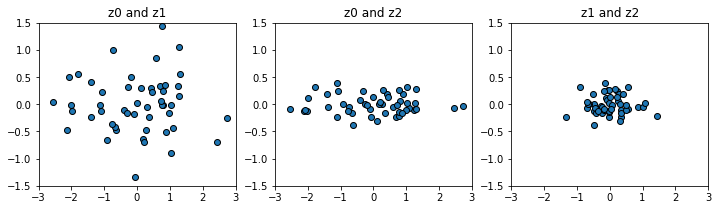

In [25]:
%matplotlib inline

plt.figure(figsize=[12,3])

plt.subplot(131)
plt.scatter(Z[:,0],Z[:,1], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z0 and z1')

plt.subplot(132)
plt.scatter(Z[:,0],Z[:,2], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z0 and z2')

plt.subplot(133)
plt.scatter(Z[:,1],Z[:,2], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z1 and z2')

plt.show()

It appears that the first two transformed variables, z0 and z1 (which coorespond to pc0 and pc1), capture most of the information contained in the original data set. 

Notes:
This is because it is quite scattered z1 and z2 are very close and seams as if z1 could give you z2


## Variance Explained Ratio

In [21]:
print(pca.explained_variance_ratio_) 
#the first and second cary 80 and 16 percent of information while the last one carries very litte so it can be deleted


[0.82130109 0.16033048 0.01836844]


In [22]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.82130109 0.98163156 1.        ]


To see where these `explained_variance_ratios` come from, lets calculate the sample variance of the original data. We will defined this to be the squared deviations from each point to the mean, `mu`, divided by `n-1`. 

In [23]:
sq_distances = np.sum( (X - mu)**2, axis=1)
var = np.sum(sq_distances) / 49
print(var)

1.6821953858400007


We will now calculate the variance of each of the three transformed variables, `z0`, `z1`, and `z2`. 

In [24]:
var_z0 = np.var(Z[:,0], ddof=1)
var_z1 = np.var(Z[:,1], ddof=1)
var_z2 = np.var(Z[:,2], ddof=1)

print(var_z0)
print(var_z1)
print(var_z2)

1.3815888978285393
0.2697071859050271
0.030899302106434406


Note that the variance in the original dataset is equal to the sum of the variances of the transformed features. 

In [25]:
print(var)
print(var_z0 + var_z1 + var_z2)

1.6821953858400007
1.6821953858400007


Diving the variance of each of the transformed features by the variance of the original dataset will produce the explained variance ratios.

In [26]:
print(var_z0 / var)
print(var_z1 / var)
print(var_z2 / var)
print()
print(pca.explained_variance_ratio_)

0.8213010863411956
0.160330475386692
0.01836843827211243

[0.82130109 0.16033048 0.01836844]


The `pca` object also has an attribute that stores the actual variances of the transformed variables (rather than just the ratios). 

In [27]:
print(pca.explained_variance_)

[1.3815889  0.26970719 0.0308993 ]


## Example 3: Using PCA for Classification

In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Generate Data

In [27]:
np.random.seed(1)
X, y = make_classification(n_samples=1000, n_classes=3, n_features=200, n_informative=20, 
                           n_redundant=0, class_sep=1.6)

M = np.random.uniform(-1,1,[200,200])
X = np.dot(X,M)
                           

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_val.shape)

(800, 200)
(200, 200)


## Logistic Regression on Original Dataset

In [28]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=2000)
model.fit(X_train, y_train)

print('Training Accuracy:  ', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy:   1.0
Validation Accuracy: 0.795


## Perform PCA 

In [29]:
pca = PCA(n_components=15) #top 15 out of 200
pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_val = pca.transform(X_val)

print(np.cumsum(pca.explained_variance_ratio_))

[0.06100372 0.11968617 0.16768736 0.21376782 0.25315286 0.29190373
 0.32360299 0.35491305 0.38289205 0.40730228 0.42989905 0.45026908
 0.46995426 0.48848301 0.50506458]


In [30]:
print(Z_train.shape)
print(Z_val.shape)

(800, 15)
(200, 15)


In [31]:
pca_model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=2000)
pca_model.fit(Z_train, y_train)

print('Training Accuracy:  ', pca_model.score(Z_train, y_train))
print('Validation Accuracy:', pca_model.score(Z_val, y_val))

Training Accuracy:   0.88375
Validation Accuracy: 0.83


Instead of arbitrarily choosing the number of dimensions to keep, it is simpler ro choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).  The following code performs the PCA withour reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set variance.

In [32]:
pca=PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax( cumsum >= 0.95) + 1
print(d)
# now we will rerun the PCA() with the 
pca = PCA(n_components=d)
pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_val = pca.transform(X_val)
print(Z_train.shape)
print(Z_val.shape)

pca_model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=2000)
pca_model.fit(Z_train, y_train)

print('Training Accuracy:  ', pca_model.score(Z_train, y_train))
print('Validation Accuracy:', pca_model.score(Z_val, y_val))


103
(800, 103)
(200, 103)
Training Accuracy:   0.95
Validation Accuracy: 0.815
